In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/train_butterflies.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ')

In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/test_butterflies.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ')

In [ ]:
import shutil
import os
import matplotlib.pyplot as plt
import torch
from PIL import Image
import re
import numpy as np
import albumentations
import albumentations.pytorch
import shutil

In [ ]:
im = Image.open('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/train_butterflies/class_0/101.jpg')
width, height = im.size

In [ ]:
type(width), height

(int, 224)

In [ ]:
all_typs={"paths" : list() , "index" : list(), 'bounds' : list() }
pp='/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/valid/'
a=os.listdir(pp)
print(a)
for j in a:
    flp = pp + "/" + j
    print(flp)
    all_typs["paths"].append(flp)
    all_typs["index"].append([1])
    im = Image.open(flp)
    width, height = im.size
    all_typs["bounds"].append([['0', '0', '224', '224']])
print(len(all_typs["paths"]))
print(len(all_typs["index"]))
print(len(all_typs["bounds"]))
all_typs

.


KeyboardInterrupt: 

In [ ]:
for i in range(0,50):
  print(len(os.listdir('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/train_butterflies/class_'+str(i))))

In [ ]:
#"/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/train_butterflies/class_0/101.jpg"

In [ ]:
all_typs={"paths" : list() , "index" : list(), 'bounds' : list() }
for i in range(50):
  pp='/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/train_butterflies/class_'+str(i)
  a=os.listdir(pp)
  for j in a:
    #print(j)
    flp=pp+"/"+j
    #print(flp)
    all_typs["paths"].append(flp)
    all_typs["index"].append([i])
    im = Image.open(flp)
    width, height = im.size
    all_typs["bounds"].append([['0','0','224','224']])
  if i%10==0:
    print(".")
    #print(width, height)
 # print(a)

.
.
.
.
.


In [ ]:
all_typs["paths"][0],all_typs["index"][0],all_typs['bounds'][0]

('/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/train_butterflies/class_0/3597.jpg',
 [0],
 [['0', '0', '224', '224']])

In [ ]:
class myOwnDataset(torch.utils.data.Dataset):
    def __init__(self, items_dict, transforms=None):
        self.items = items_dict
        self.transforms = transforms

    def __getitem__(self, index):
        path = self.items["paths"][index]
        label = self.items["index"][index]


        img = Image.open(path)
        width, height = img.size



        boxes = self.items["bounds"][index]

        new_boxes = list()
        for box in boxes:
          new_boxes.append(list(map(float, box)))
        boxes = torch.as_tensor(new_boxes, dtype=torch.float32)

        labels = torch.as_tensor(label, dtype=torch.int64)

        img_id = int(re.sub(r'[^0-9]', r'', path))
        img_id = torch.tensor([img_id])

        my_annotation = {}
        my_annotation["boxes"] = boxes
        my_annotation["labels"] = labels
        my_annotation["image_id"] = img_id

        if self.transforms:
            augmented = self.transforms(image=np.asarray(img))
            img = augmented['image']
        return img, my_annotation, path

    def __len__(self):
        return len(self.items["paths"])

In [ ]:
all_typs

In [ ]:
print(len(all_typs["bounds"]))

4955


In [ ]:
print(len(all_typs["paths"]))

4955


In [ ]:
print(len(all_typs["index"]))

4955


In [ ]:
base_transform = albumentations.Compose([
    albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    albumentations.pytorch.transforms.ToTensorV2()
])

my_dataset = myOwnDataset(items_dict=all_typs,
                          transforms=base_transform)

def collate_fn(batch):
    return tuple(zip(*batch))

train_batch_size = 1

data_loader = torch.utils.data.DataLoader(my_dataset,
                                          batch_size=train_batch_size,
                                          shuffle=True,
                                          num_workers=0,
                                          collate_fn=collate_fn)

In [ ]:
my_dataset[0]

(tensor([[[-0.6794, -0.6794, -0.7137,  ..., -1.2788, -1.2788, -1.2788],
          [-0.6794, -0.6794, -0.7137,  ..., -1.2617, -1.2445, -1.2445],
          [-0.6794, -0.6794, -0.7137,  ..., -1.2617, -1.2445, -1.2445],
          ...,
          [-1.3815, -1.4158, -1.4158,  ..., -1.2617, -1.2617, -1.3130],
          [-1.3815, -1.4158, -1.4500,  ..., -1.2274, -1.2103, -1.2788],
          [-1.4158, -1.4500, -1.5014,  ..., -1.2274, -1.2274, -1.2445]],
 
         [[-0.9503, -0.9503, -0.9503,  ..., -0.8978, -0.8978, -0.8978],
          [-0.9503, -0.9503, -0.9503,  ..., -0.8803, -0.8627, -0.8627],
          [-0.9503, -0.9503, -0.9503,  ..., -0.8277, -0.8102, -0.8102],
          ...,
          [-1.4055, -1.4405, -1.5105,  ..., -1.3704, -1.4055, -1.4230],
          [-1.4755, -1.5105, -1.5455,  ..., -1.3529, -1.3880, -1.4055],
          [-1.5105, -1.5455, -1.5980,  ..., -1.4055, -1.4055, -1.4230]],
 
         [[-1.4036, -1.4036, -1.3339,  ..., -1.7522, -1.7522, -1.7522],
          [-1.4036, -1.3687,

In [ ]:
my_dataset[0]

(tensor([[[ 1.1700,  1.2214,  1.2043,  ...,  0.8276,  0.7933,  0.7762],
          [ 1.1872,  1.2214,  1.2043,  ...,  0.8276,  0.8104,  0.8104],
          [ 1.2043,  1.2043,  1.2043,  ...,  0.8447,  0.8447,  0.8618],
          ...,
          [ 0.8276,  0.7933,  0.8104,  ..., -2.1179, -2.1008, -2.0494],
          [ 0.7933,  0.7933,  0.8104,  ..., -2.1179, -2.0837, -2.0323],
          [ 0.7933,  0.7933,  0.8104,  ..., -2.1179, -2.0665, -1.9980]],
 
         [[ 1.1155,  1.1681,  1.1506,  ...,  0.9580,  0.9755,  0.9755],
          [ 1.1331,  1.1681,  1.1506,  ...,  0.9580,  0.9930,  1.0105],
          [ 1.1506,  1.1506,  1.1506,  ...,  0.9580,  0.9930,  1.0105],
          ...,
          [ 0.9230,  0.8880,  0.9055,  ..., -2.0182, -1.9832, -1.9307],
          [ 0.8880,  0.8880,  0.8880,  ..., -2.0182, -1.9657, -1.9132],
          [ 0.8880,  0.8880,  0.8880,  ..., -2.0007, -1.9482, -1.8782]],
 
         [[ 0.6356,  0.6879,  0.6705,  ...,  0.8274,  0.7751,  0.6879],
          [ 0.6531,  0.6879,

In [ ]:
for batch in data_loader:
  print(len(batch))
  print(batch)
  break

In [ ]:
import platform
import torch
if torch.cuda.is_available():
    print("Using GPU: {}\n".format(torch.cuda.get_device_name()))
    device = torch.device('cuda')
else:
    print("\nGPU not found. Using CPU: {}\n".format(platform.processor()))
    device = torch.device('cpu')

Using GPU: Tesla T4



In [ ]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# backbone = torchvision.models.mobilenet_v2(pretrained=True).features
# backbone.out_channels = 1280

backbone = torchvision.models.mobilenet_v3_large(pretrained=True).features
backbone.out_channels = 960

#backbone = torchvision.models.mobilenet_v3_small(pretrained=True).features
#backbone.out_channels = 576

# backbone = resnet_fpn_backbone('resnet34', pretrained=True)


anchor_generator = AnchorGenerator(sizes=((32, 64, 128,224),),
                                   aspect_ratios=((0.5, 1.0),))

roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                output_size=7,
                                                sampling_ratio=2)
model = FasterRCNN(backbone,
                   num_classes=51,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)
#model.load_state_dict(torch.load('/content/drive/MyDrive/butmodel.pth'))
#model.eval()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)
model = model.to(device)

Device: cuda:0


In [ ]:
my_dataset[0][0]

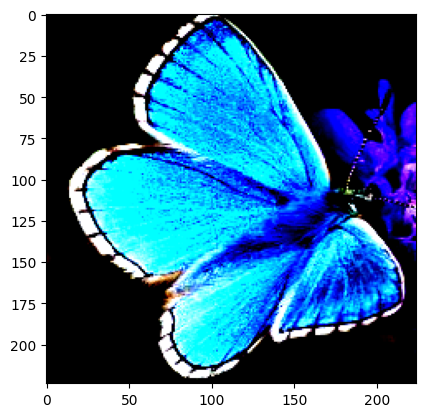

In [ ]:
plt.imshow(my_dataset[0].permute(1,2, 0))[0]

In [ ]:
num_epochs = 2

params = [p for p in model.parameters() if p.requires_grad]

learning_rate = 0.1
optimizer = torch.optim.Adam(params, amsgrad=True, lr=learning_rate)
# optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=0.9)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
obi=imgs

In [ ]:
obi

[tensor([[[ 1.5639,  1.5982,  1.6324,  ...,  0.8447,  0.8447,  0.8276],
          [ 1.5639,  1.5982,  1.6324,  ...,  0.8789,  0.8618,  0.8618],
          [ 1.5810,  1.5982,  1.6324,  ...,  0.8789,  0.8276,  0.8276],
          ...,
          [-1.3130, -1.2788, -1.2617,  ...,  0.7248,  0.7077,  0.6563],
          [-1.3302, -1.2959, -1.2788,  ...,  0.7077,  0.6734,  0.6392],
          [-1.3644, -1.3130, -1.2959,  ...,  0.6734,  0.6563,  0.6221]],
 
         [[ 1.6057,  1.6408,  1.6758,  ...,  0.9930,  0.9755,  0.9930],
          [ 1.6057,  1.6408,  1.6758,  ...,  0.9755,  0.9930,  1.0280],
          [ 1.6232,  1.6408,  1.6758,  ...,  0.9755,  0.9580,  0.9580],
          ...,
          [-0.7577, -0.7227, -0.7052,  ...,  0.7304,  0.7129,  0.6604],
          [-0.8102, -0.7752, -0.7402,  ...,  0.7129,  0.6779,  0.6429],
          [-0.8452, -0.7927, -0.7577,  ...,  0.6779,  0.6604,  0.6254]],
 
         [[ 1.6465,  1.6814,  1.7163,  ...,  1.0714,  1.1237,  1.1237],
          [ 1.6814,  1.6814,

In [ ]:
k=0
for imgs, annotations, path in data_loader:
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        print(imgs)
        print(annotations)
        break
       # loss_dict = model(imgs, annotations)
       # losses = sum(loss for loss in loss_dict.values())

       # optimizer.zero_grad()
       # losses.backward()
       # optimizer.step()

        #sum_losses += losses
        k+=1
        if k%1000==0:
          print(k)

[tensor([[[-0.2684, -0.1828, -0.1999,  ..., -0.3712, -0.4397, -0.4568],
         [-0.3198, -0.2513, -0.2342,  ..., -0.3369, -0.3883, -0.4054],
         [-0.3712, -0.3198, -0.2684,  ..., -0.2856, -0.3369, -0.3541],
         ...,
         [-0.3198, -0.3883, -0.3541,  ..., -0.8335, -0.8164, -0.8507],
         [-0.3369, -0.4054, -0.4397,  ..., -0.8849, -0.8678, -0.8164],
         [-0.4397, -0.3369, -0.4054,  ..., -0.8849, -0.9534, -0.8335]],

        [[ 0.5553,  0.6429,  0.5728,  ...,  0.4328,  0.4153,  0.3978],
         [ 0.5028,  0.5728,  0.5378,  ...,  0.4678,  0.4678,  0.4503],
         [ 0.4853,  0.5378,  0.5553,  ...,  0.5203,  0.5203,  0.5028],
         ...,
         [ 0.8704,  0.8004,  0.7829,  ..., -0.0924, -0.1450, -0.2325],
         [ 0.9055,  0.8004,  0.7129,  ..., -0.1099, -0.2150, -0.2150],
         [ 0.8004,  0.9055,  0.7479,  ..., -0.1275, -0.3025, -0.2325]],

        [[-0.4624, -0.3578, -0.3753,  ..., -0.7587, -0.7936, -0.8110],
         [-0.5147, -0.4450, -0.4101,  ..., -

In [ ]:
annotations

[{'boxes': tensor([[  0.,   0., 224., 224.]], device='cuda:0'),
  'labels': tensor([28], device='cuda:0'),
  'image_id': tensor([284319], device='cuda:0')}]

In [ ]:
for imgs, annotations, path in data_loader:
  print(1)

In [ ]:
for epoch in range(num_epochs):
    if epoch != 0:
        scheduler.step()
    model.train()
    sum_losses = 0
    k=0
    for imgs, annotations, path in data_loader:
        imgs = list(img.to(device) for img in imgs)
        #print(imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        loss_dict = model(imgs, annotations)
       # print(imgs,annotations)
        #print(loss_dict)

        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        sum_losses += losses
        k+=1
        if k%1000==0:
          print(".")
    print(f'Epoch: {epoch + 1}/{num_epochs}, avg loss: {sum_losses / len(data_loader)}')

.
.
.
.
Epoch: 1/2, avg loss: 89.9053955078125
.
.
.
.
Epoch: 2/2, avg loss: 0.8761793971061707


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/butmodelnew.pth")

In [ ]:
all_typs={"paths" : list() , "index" : list(), 'bounds' : list() }
pp='/content/drive/MyDrive/ЛЕТАЮЩИЕ НАСЕКОМЫЕ/valid/'
a=os.listdir(pp)
print(a)
for j in a:
    flp = pp + "/" + j
    print(flp)
    all_typs["paths"].append(flp)
    all_typs["index"].append([1])
    im = Image.open(flp)
    width, height = im.size
    all_typs["bounds"].append([['0', '0', '224', '224']])
print(len(all_typs["paths"]))
print(len(all_typs["index"]))
print(len(all_typs["bounds"]))
all_typs

In [ ]:
class myOwnDataset(torch.utils.data.Dataset):
    def __init__(self, items_dict, transforms=None):
        self.items = items_dict
        self.transforms = transforms

    def __getitem__(self, index):
        path = self.items["paths"][index]
        label = self.items["index"][index]


        img = Image.open(path)
        width, height = img.size



        boxes = self.items["bounds"][index]

        new_boxes = list()
        for box in boxes:
          new_boxes.append(list(map(float, box)))
        boxes = torch.as_tensor(new_boxes, dtype=torch.float32)

        labels = torch.as_tensor(label, dtype=torch.int64)

        img_id = int(re.sub(r'[^0-9]', r'', path))
        img_id = torch.tensor([img_id])

        my_annotation = {}
        my_annotation["boxes"] = boxes
        my_annotation["labels"] = labels
        my_annotation["image_id"] = img_id

        if self.transforms:
            augmented = self.transforms(image=np.asarray(img))
            img = augmented['image']
        return img, my_annotation, path

    def __len__(self):
        return len(self.items["paths"])



base_transform = albumentations.Compose([
    albumentations.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    albumentations.pytorch.transforms.ToTensorV2()
])

my_dataset = myOwnDataset(items_dict=all_typs,
                          transforms=base_transform)

def collate_fn(batch):
    return tuple(zip(*batch))

train_batch_size = 1

data_loader = torch.utils.data.DataLoader(my_dataset,
                                          batch_size=train_batch_size,
                                          shuffle=True,
                                          num_workers=0,
                                          collate_fn=collate_fn)


import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# backbone = torchvision.models.mobilenet_v2(pretrained=True).features
# backbone.out_channels = 1280

backbone = torchvision.models.mobilenet_v3_large(pretrained=True).features
backbone.out_channels = 960

#backbone = torchvision.models.mobilenet_v3_small(pretrained=True).features
#backbone.out_channels = 576

# backbone = resnet_fpn_backbone('resnet34', pretrained=True)

anchor_generator = AnchorGenerator(sizes=((32, 64, 128,224),),
                                   aspect_ratios=((0.5, 1.0),))

roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                output_size=7,
                                                sampling_ratio=2)
model = FasterRCNN(backbone,
                   num_classes=51,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)
model.load_state_dict(torch.load('/content/drive/MyDrive/butmodelnew.pth'))
model.eval()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)
model = model.to(device)
num_epochs = 1
print(1)
params = [p for p in model.parameters() if p.requires_grad]

learning_rate = 0.1
optimizer = torch.optim.Adam(params, amsgrad=True, lr=learning_rate)
# optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=0.9)
print(2)

Device: cuda:0
1
2


In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
result = model(imgs)

In [ ]:
result

[{'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)}]

In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
for imgs, annotations, path in data_loader:
      #print(imgs)
     # break
      with torch.no_grad():
        # torch.cuda.empty_cache()
        imgs = list(img.to(device) for img in imgs)
        print(imgs)

        print(imgs[0].size())
        print(len(imgs))
        #annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        result = model(imgs)
        print(result)
        break

[tensor([[[-0.9020, -0.9534, -1.0048,  ...,  0.4166,  0.0569,  0.1426],
         [-0.9192, -0.8849, -0.9192,  ...,  0.0741,  0.0398,  0.0227],
         [-0.9020, -0.9192, -0.9363,  ...,  0.0227, -0.0116,  0.0398],
         ...,
         [ 0.7077,  0.3994,  0.3823,  ..., -0.6623, -0.7479, -0.7479],
         [ 0.4166,  0.7762,  0.5022,  ..., -0.6623, -0.9534, -0.7308],
         [ 0.3481,  0.4508,  0.3994,  ..., -0.6452, -0.6623, -0.8507]],

        [[-0.4601, -0.5126, -0.5651,  ...,  0.6954,  0.3277,  0.4153],
         [-0.4776, -0.4426, -0.4776,  ...,  0.3452,  0.3102,  0.2927],
         [-0.4601, -0.4776, -0.4951,  ...,  0.2927,  0.2577,  0.3102],
         ...,
         [ 1.1856,  0.9055,  0.9405,  ...,  0.1702,  0.0826,  0.0826],
         [ 0.8704,  1.2731,  1.0980,  ...,  0.1352, -0.1625,  0.0651],
         [ 0.8004,  0.9405,  0.9930,  ...,  0.1527,  0.1352, -0.0574]],

        [[-1.1944, -1.2467, -1.2990,  ...,  0.2696, -0.0964, -0.0092],
         [-1.2119, -1.1770, -1.2119,  ..., -